# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the dataset

In [2]:
df = pd.read_csv("../data/urban_traffic_intelligence_dataset.csv")
df.head()

,road_id,hour,day_of_week,is_weekend,road_type,lane_count,weather,visibility_km,accident_reported,traffic_volume,avg_speed,travel_time_min,congestion_level
0,103,11,0,0,Highway,5,Rain,4.700783,0,130,43.962934,17.303469,Low
1,52,1,0,0,Local,1,Clear,6.237843,0,393,69.132264,17.131562,Low
2,93,17,5,1,Highway,5,Clear,6.251072,0,1225,42.718578,40.431364,High
3,15,6,6,1,Highway,5,Rain,2.344686,0,301,33.536640,22.129002,Low
4,107,16,4,0,Highway,4,Clear,6.657439,0,273,31.774258,19.769051,Low


In [3]:
df.isnull().sum()

road_id              0
hour                 0
day_of_week          0
is_weekend           0
road_type            0
lane_count           0
weather              0
visibility_km        0
accident_reported    0
traffic_volume       0
avg_speed            0
travel_time_min      0
congestion_level     0
dtype: int64

In [4]:
df.nunique()

road_id                119
hour                    24
day_of_week              7
is_weekend               2
road_type                3
lane_count               5
weather                  3
visibility_km        12000
accident_reported        2
traffic_volume        1305
avg_speed            11777
travel_time_min      12000
congestion_level         3
dtype: int64

# Target Variable Analysis (Classification)

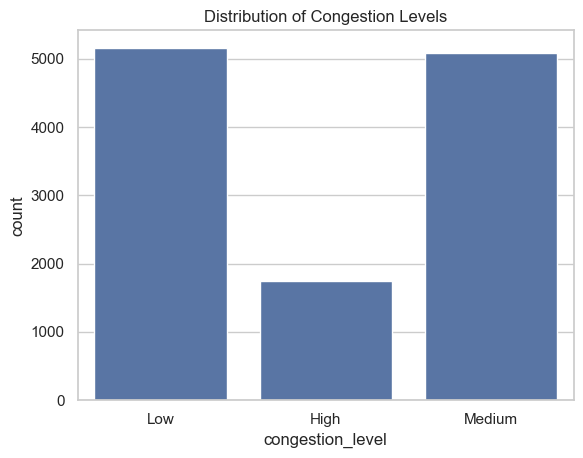

In [5]:
sns.countplot(x="congestion_level", data=df)
plt.title("Distribution of Congestion Levels")
plt.show()

- Classes are not perfectly balanced
- Accuracy alone will be misleading
- Precision/Recall/F1 are more appropriate


# Traffic Volume vs Congestion

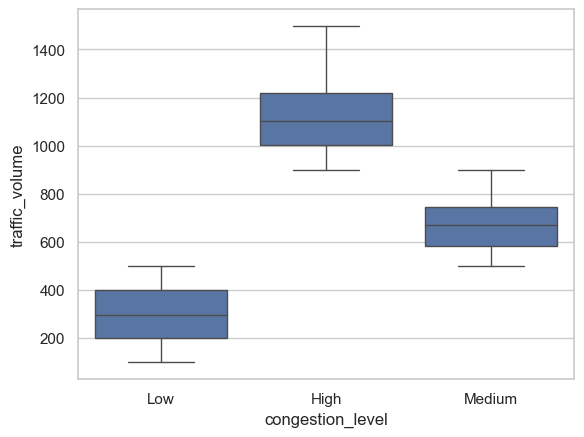

In [6]:
sns.boxplot(x="congestion_level", y="traffic_volume", data=df)
plt.show()

# Hourly Traffic Pattern

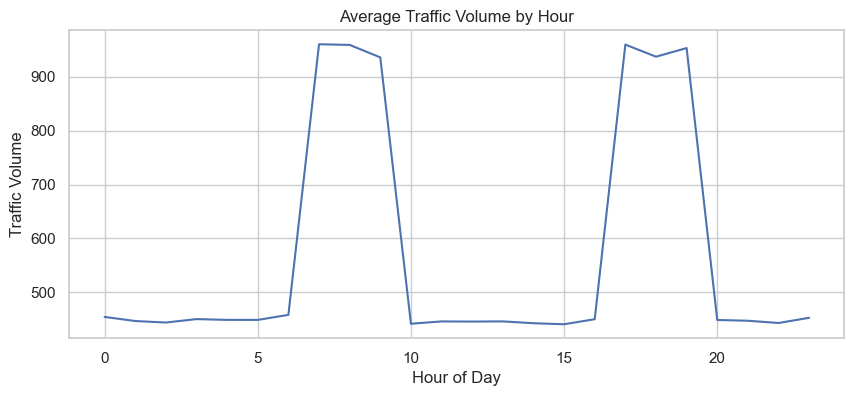

In [7]:
hourly = df.groupby("hour")["traffic_volume"].mean()

plt.figure(figsize=(10,4))
hourly.plot()
plt.title("Average Traffic Volume by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Traffic Volume")
plt.show()

# Weather Impact

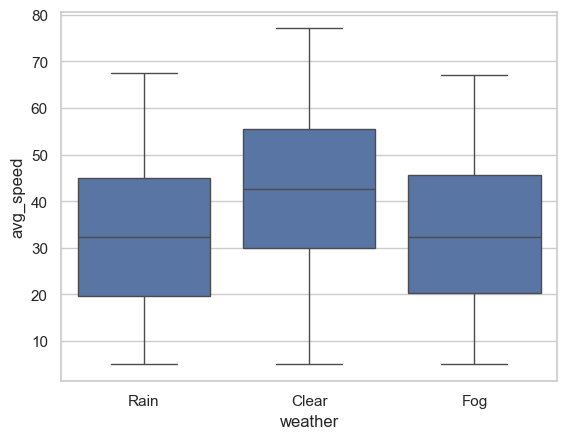

In [8]:
sns.boxplot(x="weather", y="avg_speed", data=df)
plt.show()

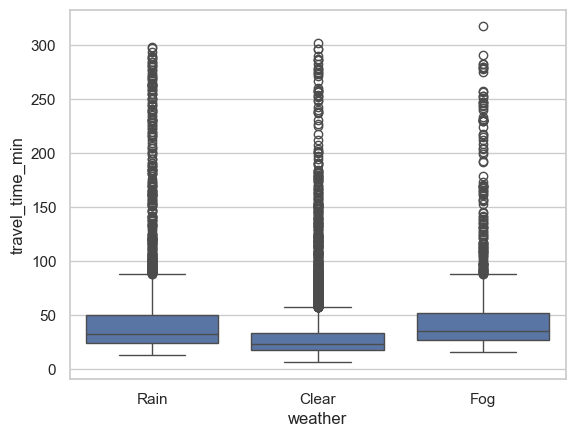

In [9]:
sns.boxplot(x="weather", y="travel_time_min", data=df)
plt.show()

- Rain and Fog reduce speed
- Travel time increases under adverse weather
- Weather must be included in models

# Feature Engineering – Peak Hour Flag

In [10]:
df["is_peak_hour"] = df["hour"].isin([7,8,9,17,18,19]).astype(int)

df[["hour", "is_peak_hour"]].head()

,hour,is_peak_hour
0,11,0
1,1,0
2,17,1
3,6,0
4,16,0


# Feature Engineering – Cyclical Time Encoding

In [11]:
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

df[["hour", "hour_sin", "hour_cos"]].head()

,hour,hour_sin,hour_cos
0,11,0.258819,-9.659258e-01
1,1,0.258819,9.659258e-01
2,17,-0.965926,-2.588190e-01
3,6,1.000000,6.123234e-17
4,16,-0.866025,-5.000000e-01


# Encode Weekend Effect

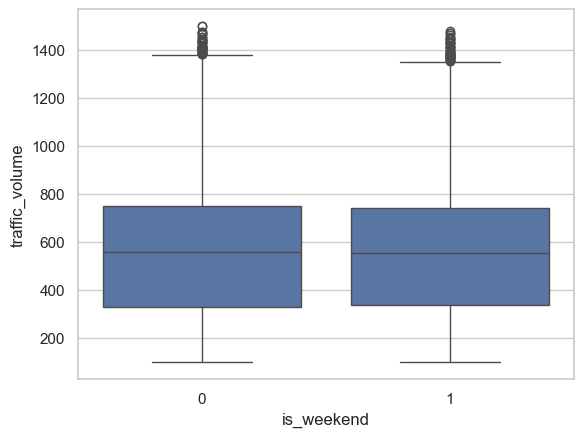

In [12]:
sns.boxplot(x="is_weekend", y="traffic_volume", data=df)
plt.show()

- Weekends show different traffic behavior
- Feature is meaningful


# Correlation Analysis

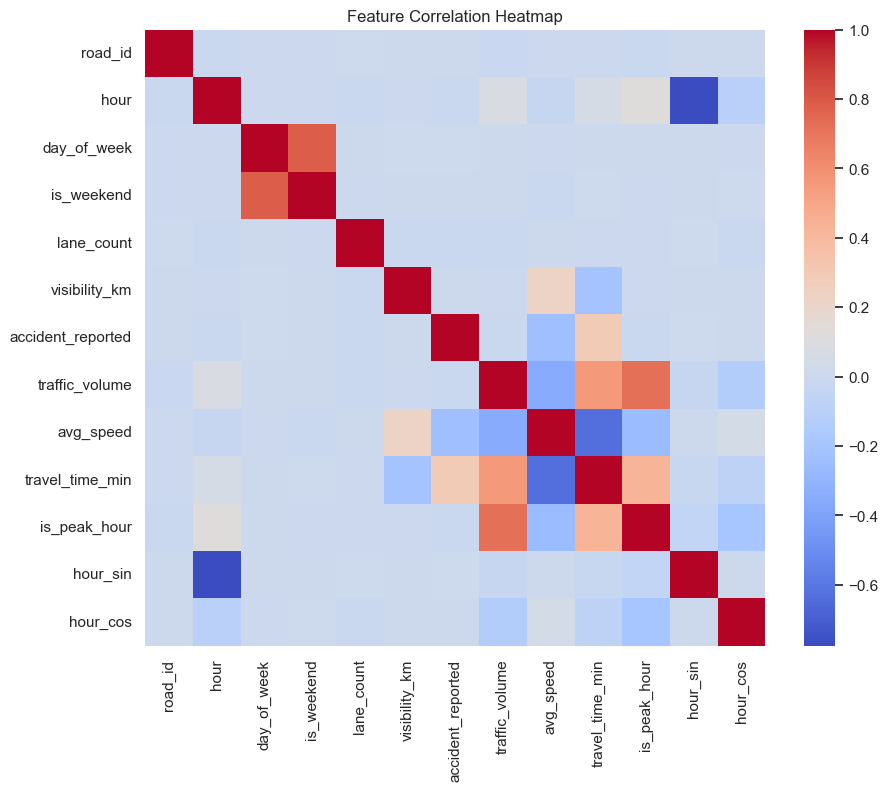

In [13]:
num_df = df.select_dtypes(exclude="object")

plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Save Engineered Dataset

In [14]:
df.to_csv("../data/urban_traffic_engineered.csv", index=False)